**1. Objective**


- Overview

Integrate Probability and Statistics, Linear Regression, and Logistic Regression theories
into a cohesive case study that demonstrates their application in predicting an outcome based on
a given dataset.

- Goal

Predict [Outcome] using the dataset provided, utilizing Linear and Logistic Regression
models to analyze and interpret the results.

**2. Dataset Preparation**


- Description

The Diabetes dataset to be used in this case study consist of different diagnostic measurements that are collected from different group of patients. This dataset includes some variables such as blood pressure, body mass index (BMI), age, and other medical records as the independent variables and the actual outcome as the dependent variable. The dataset can be used for two purposes. Firstly, in Linear Regression, to predict a quantitative measure of disease progression. Secondly, in Logistic Regression to classify the patients into different categories such as diabetic and non-diabetic based on the diagnosis.

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

Load Datasets

In [ ]:
data = pd.read_csv('diabetes.csv')
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Handle the Missing Values

In [ ]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Encode Categorical Variables - This process is skipped since there are no data that are needed to be converted to integers. All datas are already numbers to begin with.

Feature Selection

In [ ]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies['End_result'] = (data['Outcome']>0).astype(int)

x = data_dummies.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis=1)
y = data_dummies['End_result']

**3. Exploratory Data Analysis (EDA)**


- Probability and Statistics Concepts

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Visualization

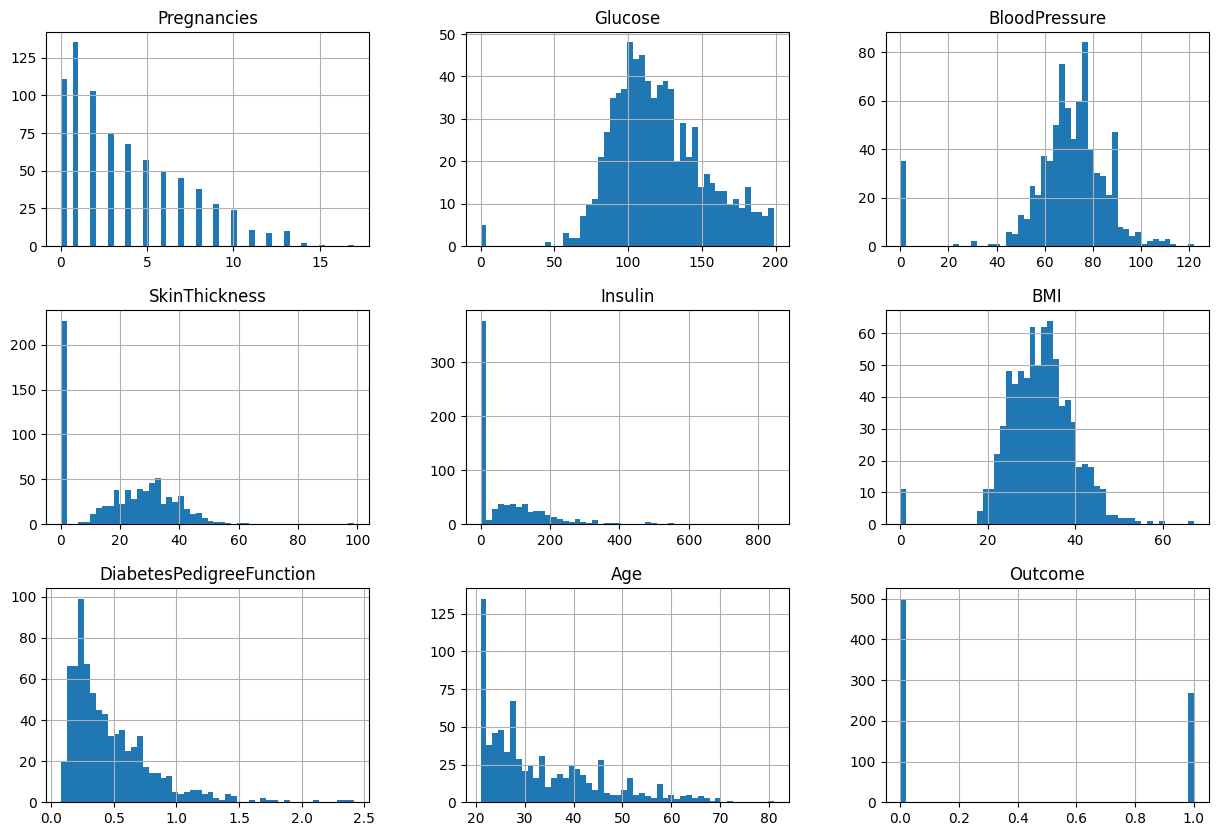

In [ ]:
data.hist(bins=50, figsize=(15,10))
plt.show()

**4. Linear Regression Model**

- Theory Recap


In Linear Regression, we assume that there is a straight-line relationship between the outcome we want to predict (dependent variable) and the factors we use to make predictions (independent variables). We also assume that the errors or differences between predicted and actual values follow a normal distribution and have consistent variability across all data points showing homoscedasticity. Understanding these assumptions is important because if they are not met, the accuracy and reliability of our predictions can be affected. It's also essential to consider how different independent variables relate to each other (collinearity) to avoid issues that can distort our model's results.

- Implementation

Build the Model

In [ ]:
x = data[['Insulin']]
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
coefficient = model.coef_
print("Slope: ", slope)
print("Intercept:", intercept)
print("Coefficients:", coefficient)

Slope:  0.0005402886537067087
Intercept: 0.30584358016787844
Coefficients: [0.00054029]


- Evaluation

In [ ]:
linear_reg_model = LinearRegression()

linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
_predictions = linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test, _predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, _predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 0.22164339060922994
Root Mean Squared Error (RMSE): 0.47079017684020336
R-squared Score: 0.0346198986797982


**5. Logistic Regression Model**

- Theory Recap

Logistic regression is a statistical analysis method to predict a binary outcome or problems. This regression is use when you want to precdict whether something is true or false, yes or no, or falls into one of two categories just like in the case study, whether the patient is diabetic or not. It calculates the probability of the result by using the input variables. The model predicts which category an observation is likely to belong to by using a logistic function to convert the linear combination of input features into a probability score.

- Implementation

Build the Model

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
coefficient = model.coef_

print("Coefficients:", coefficient)

Coefficients: [[0.21801546]]


- Evaluation

In [ ]:
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)

Accuracy: 0.6493506493506493
Confusion Matrix: 
[[98  1]
 [53  2]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.99      0.78        99
           1       0.67      0.04      0.07        55

    accuracy                           0.65       154
   macro avg       0.66      0.51      0.43       154
weighted avg       0.66      0.65      0.53       154



ROC Curve, and AUC (Area Under the Curve)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


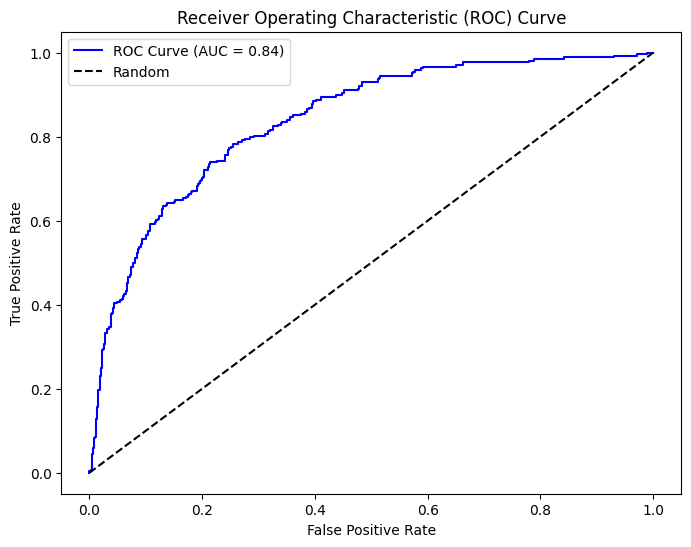

AUC Score: 0.838813432835821


In [ ]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

model = LogisticRegression()
model.fit(X, y)

y_prob = model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_prob)

auc_score = roc_auc_score(y, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("AUC Score:", auc_score)

**6. Model Comparison and Selection**


- Linear and logistic regression are so different to each other. Linear Regression is most effective for predicting continuous outcomes focusing on how well the model's predictions match the actual values with the use of MSE, RMSE, and R-squared. In Logistic Regression, it is used for binary classification tasks, assessing outcomes like "yes or no," and it evaluates performance through metrics such as accuracy, precision, recall, etc.

 In the study, the logistic regression model achieved a decent accuracy of around 64.94%. Now in the linear regression at the MSE, RMSE, and R-squared, it was kind of good but it is not that high which make me somewhat think that it is not that fit. In the end, the choice between logistic and linear regression basically comes down to whether the prediction problem requires exact value calculation (linear regression) or data categorization (logistic regression).

- Now in this case study, choosing one models based on their factors is very difficult because the two model have their own use. Linear Regression for predicting a quantitative measure of disease progression and Logistic Regression for classifying patients into categories based on diagnostic
measurements. But if I needed to choose one here, since my dependent is focused more on the 'Outcome' with the value of 0 and 1, then I'll pick the logistic regression one so it will be easy for me to know who the patients that are diabetic and put more focus on them.

**7. Conclusion and Insights**

- The models showed really significant results especially in the logistic regression with a high accuracy. The case study clearly showed how  the data-driven decisions can be made using statistical and machine learning techniques, greatly improving operational efficiency and prediction accuracy. We were able to model and predict continuous outcomes related to diabetes progression based on different diagnostic data by using Linear Regression, in which can help with the immediate treatment and management of the condition. On the other hand, patients were categorized (diabetic vs. non-diabetic) using logistic regression, which aided in the early detection of those in need of rapid medical attention. Since both of the models showed different yet significant results they made it possible to understand the relationships between different health indicators and how diabetes is affected by them in greater detail, which gave medical professionals useful information.

- These models are very useful in different fields, for example in the case study that we just made, it is helpful the field of medicine, in healthcare, and the whole job/business of the different doctors in hospitals. This can help them a lot since it shows the impacts of health factors into ones cause of sickness through disease diagnosis. It can also be used in finance, and also in social sciences. Now by understanding the models assumptions and limits, one can use the best validation methods, interpret results with care, and choose the best modeling strategy to use on a specific problem, whether one of the two models or both. This form of reflection provides solid, reliable findings that really improve decision-making processes in all fields.

**8. References**

Diabetes Dataset for Beginners. (2022, February 25). Kaggle. https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners/data

Lawton, G., Burns, E., & Rosencrance, L. (2022, January 20). logistic regression. Business Analytics. https://www.techtarget.com/searchbusinessanalytics/definition/logistic-regression

Matplotlib documentation — Matplotlib 3.8.4 documentation. (n.d.). https://matplotlib.org/stable/

NumPy documentation — NumPy v2.1.dev0 Manual. (n.d.). https://numpy.org/devdocs/index.html

Plotly. (n.d.). https://plotly.com/python/plotly-express/

scikit-learn: machine learning in Python — scikit-learn 1.4.2 documentation. (n.d.). https://scikit-learn.org/stable/index.html#

seaborn: statistical data visualization — seaborn 0.13.2 documentation. (n.d.). https://seaborn.pydata.org/index.html

Shah, D. (2024, April 10). Logistic Regression: definition, use cases, implementation. V7. https://www.v7labs.com/blog/logistic-regression

Simple linear regression. (n.d.). https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html#:~:text=There%20are%20four%20assumptions%20associated,are%20independent%20of%20each%20other.